<a href="https://www.kaggle.com/code/prasadposture121/financial-distress-prediction?scriptVersionId=117246645" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Financial Distress Prediction

## Importing Libraries

In [1]:
#ignoring warnings to keep the code clean
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install opendatasets

Note: you may need to restart the kernel to use updated packages.


In [3]:
#importing dependencies
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Loading Data

In [4]:
import opendatasets as od
od.download('https://www.kaggle.com/c/GiveMeSomeCredit')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

Your Kaggle username:

  prasadposture121


Your Kaggle Key:

  ································


100%|██████████| 5.16M/5.16M [00:00<00:00, 6.55MB/s]


Extracting archive ./GiveMeSomeCredit/GiveMeSomeCredit.zip to ./GiveMeSomeCredit


In [5]:
os.listdir('GiveMeSomeCredit')

['sampleEntry.csv', 'cs-test.csv', 'Data Dictionary.xls', 'cs-training.csv']

In [6]:
train_df = pd.read_csv('./GiveMeSomeCredit/cs-training.csv')
print(train_df.shape)
train_df.head()

(150000, 12)


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [7]:
test_df = pd.read_csv('./GiveMeSomeCredit/cs-test.csv')
print(test_df.shape)
test_df.head()

(101503, 12)


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [8]:
submission =  pd.read_csv('./GiveMeSomeCredit/sampleEntry.csv')
submission.head()

,Id,Probability
0,1,0.080807
1,2,0.040719
2,3,0.011968
3,4,0.067640
4,5,0.108264


In [9]:
train_df['SeriousDlqin2yrs'].unique()

array([1, 0])

Labels are in the form of binary numbers.

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            101503 non-null  int64  
 1   SeriousDlqin2yrs                      0 non-null       float64
 2   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 3   age                                   101503 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 5   DebtRatio                             101503 non-null  float64
 6   MonthlyIncome                         81400 non-null   float64
 7   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 8   NumberOfTimes90DaysLate               101503 non-null  int64  
 9   NumberRealEstateLoansOrLines          101503 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int64  
 11  

## Exploratory Data Analysis

### Stastical Information

In [12]:
train_df.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [13]:
test_df.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,101503.000000,0.0,101503.000000,101503.000000,101503.000000,101503.000000,8.140000e+04,101503.000000,101503.000000,101503.000000,101503.000000,98877.000000
mean,50752.000000,NaN,5.310000,52.405436,0.453770,344.475020,6.855036e+03,8.453514,0.296691,1.013074,0.270317,0.769046
std,29301.536524,NaN,196.156039,14.779756,4.538487,1632.595231,3.650860e+04,5.144100,4.515859,1.110253,4.503578,1.136778
min,1.000000,NaN,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25376.500000,NaN,0.030131,41.000000,0.000000,0.173423,3.408000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,50752.000000,NaN,0.152586,52.000000,0.000000,0.364260,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,76127.500000,NaN,0.564225,63.000000,0.000000,0.851619,8.200000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,101503.000000,NaN,21821.000000,104.000000,98.000000,268326.000000,7.727000e+06,85.000000,98.000000,37.000000,98.000000,43.000000


In [15]:
train_df['SeriousDlqin2yrs'].value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

In [18]:
train0=train_df[train_df['SeriousDlqin2yrs']==0].sample(frac=0.3)
train1=train_df[train_df['SeriousDlqin2yrs']==1].copy()
train_df=pd.concat([train0, train1], axis=0)
train_df['SeriousDlqin2yrs'].value_counts()

0    41992
1    10026
Name: SeriousDlqin2yrs, dtype: int64

### Distribution of data

In [19]:
Atttributes= ['RevolvingUtilizationOfUnsecuredLines', 'age',
              'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
              'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
              'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
              'NumberOfDependents']

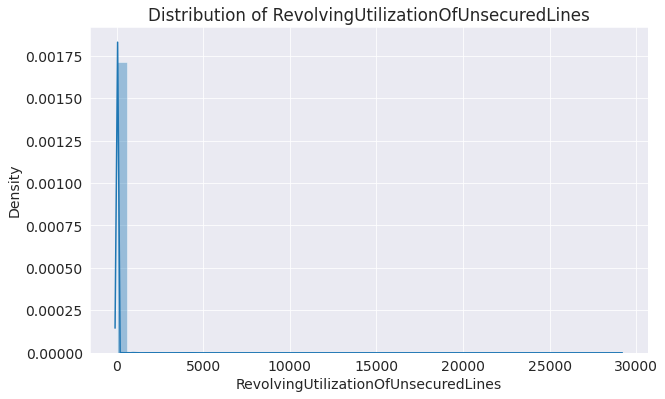

/n


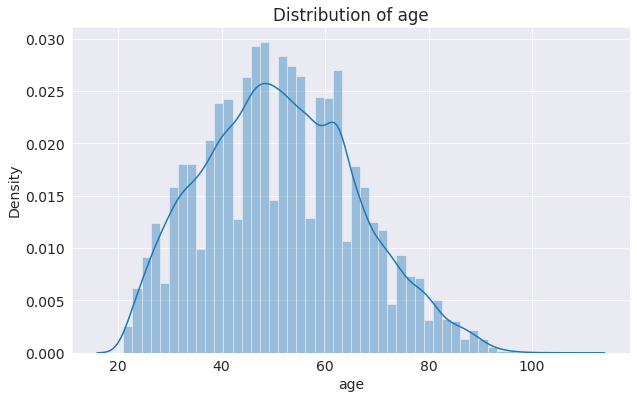

/n


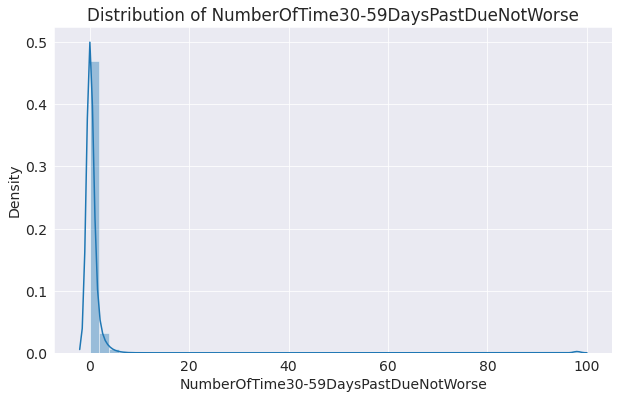

/n


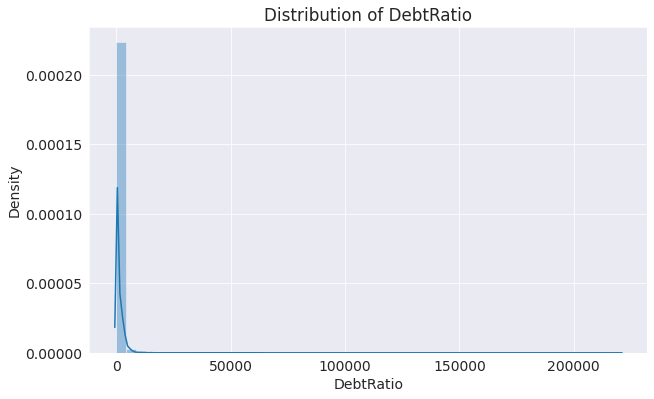

/n


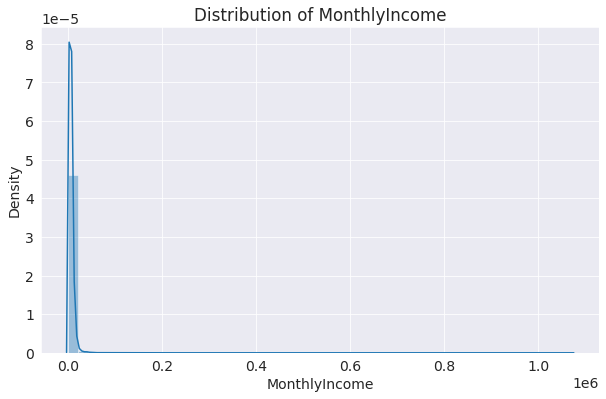

/n


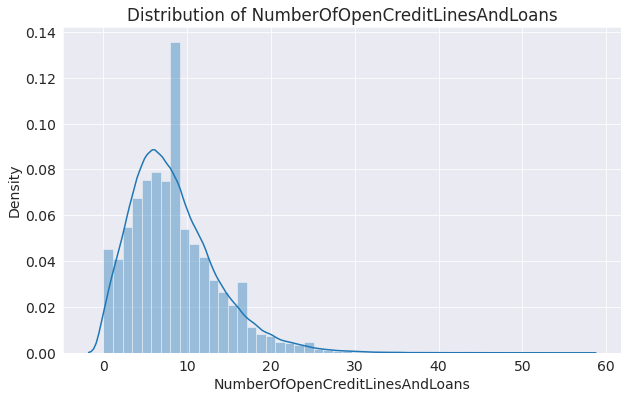

/n


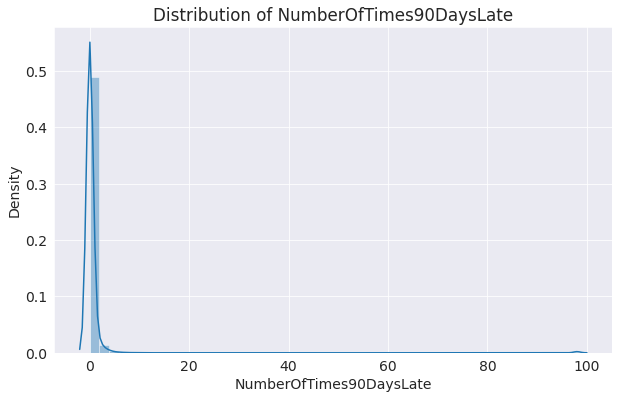

/n


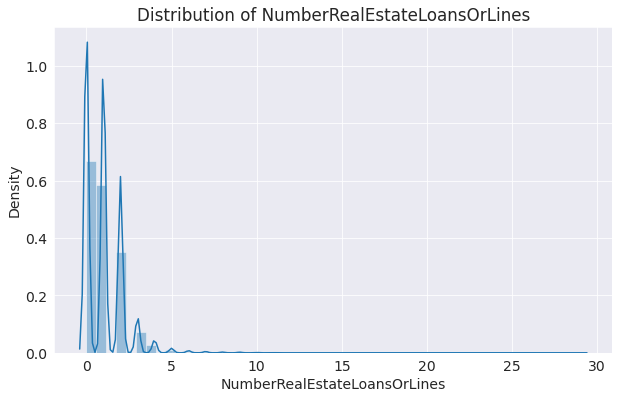

/n


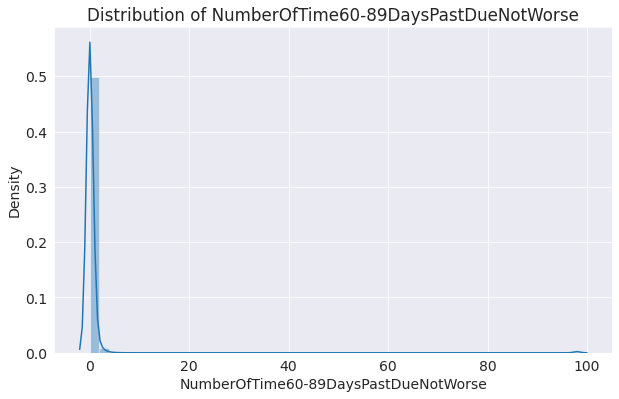

/n


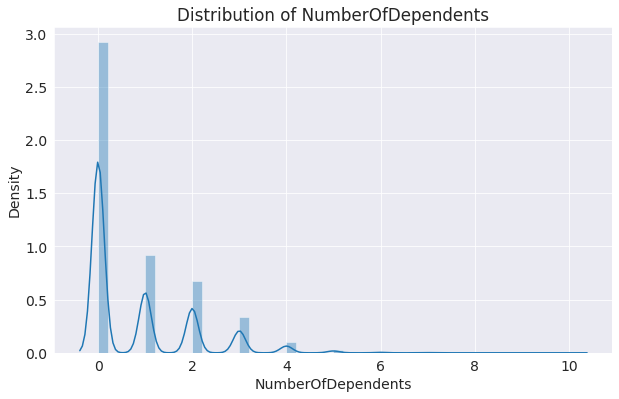

/n


In [20]:
for i in Atttributes:
    sns.distplot(train_df[i])
    plt.title('Distribution of '+i)
    plt.show()
    print('/n')

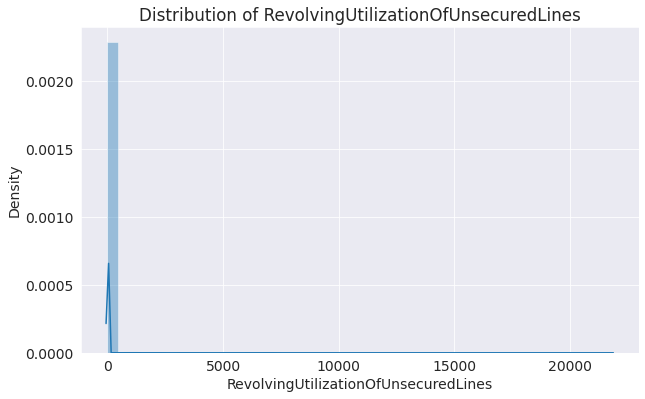

/n


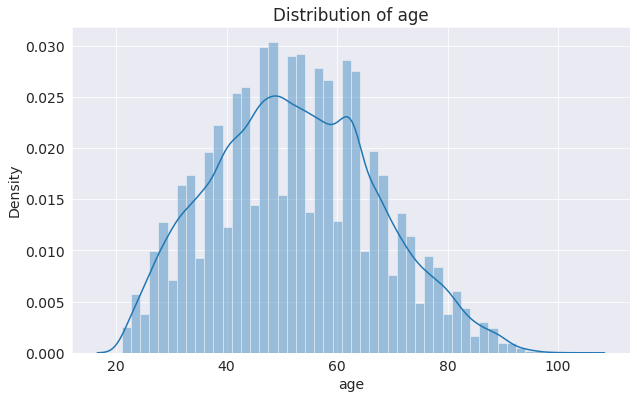

/n


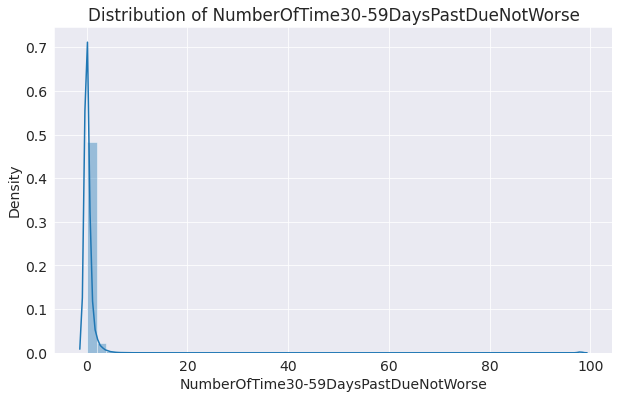

/n


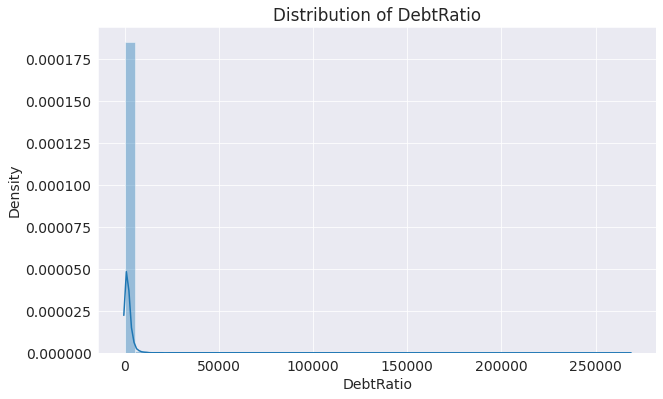

/n


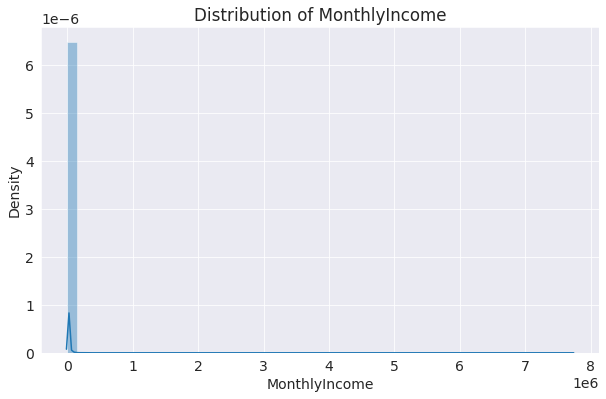

/n


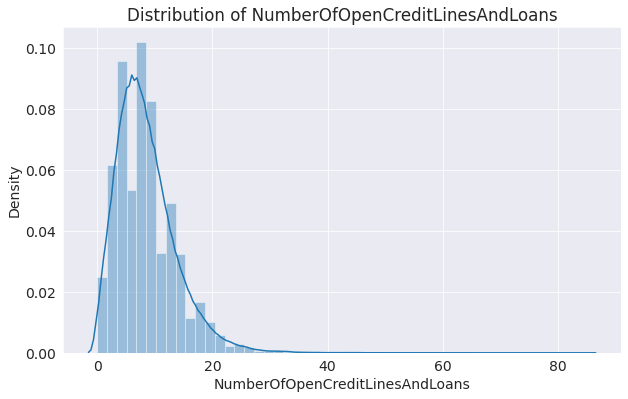

/n


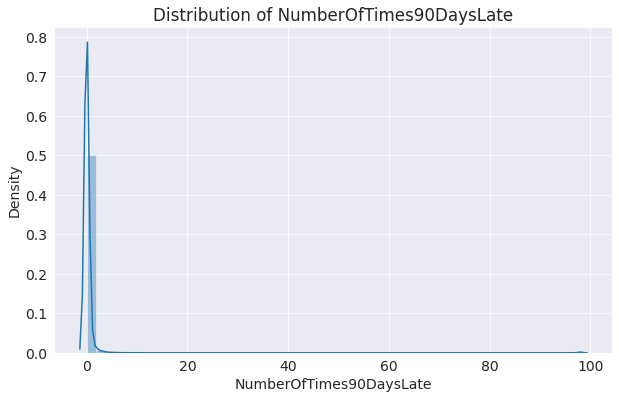

/n


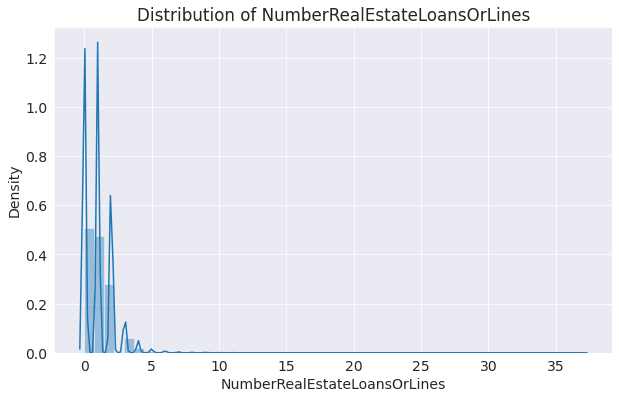

/n


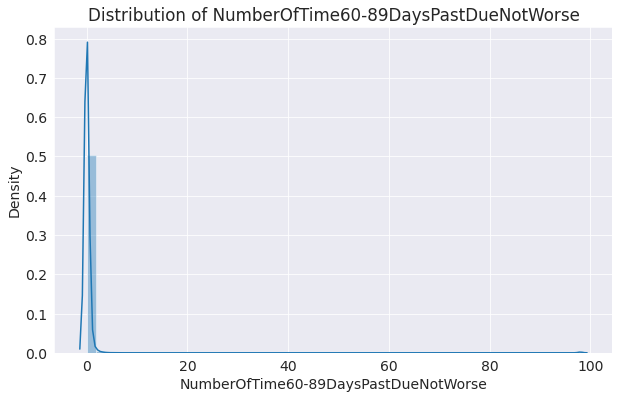

/n


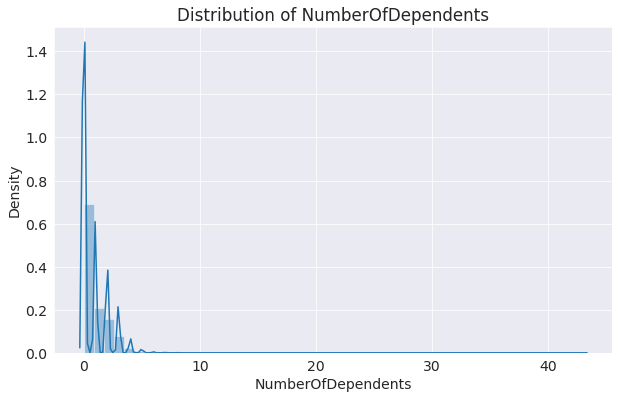

/n


In [21]:
for i in Atttributes:
    sns.distplot(test_df[i])
    plt.title('Distribution of '+i)
    plt.show()
    print('/n')

There are lot of outliers in both datasets. We need to take care of them properly so that they don't trouble us after scaling the data. For that we will substitute the outliers with value which comes under two times stadard deviation. We choosing two times standard deviation since it covers 95% of the part of the distribution.

In [22]:
def normalizer(x,df):
    upper_boundary=df[x].mean()+2*df[x].std()
    lower_boundary=df[x].mean()-2*df[x].std()
    max_att=df[x].max()
    min_att=df[x].min()
    return {'Attribute':x, 'upper_boundary': upper_boundary, 'lower_boundary': lower_boundary, 
           'max_att':max_att, 'min_att':min_att }

In [23]:
train_limits = pd.DataFrame([normalizer(x, train_df) for x in Atttributes])
train_limits

,Attribute,upper_boundary,lower_boundary,max_att,min_att
0,RevolvingUtilizationOfUnsecuredLines,521.495679,-508.477264,29110.0,0.0
1,age,80.798097,22.009431,109.0,21.0
2,NumberOfTime30-59DaysPastDueNotWorse,12.434194,-11.057478,98.0,0.0
3,DebtRatio,3852.132983,-3156.056295,220516.0,0.0
4,MonthlyIncome,26208.755358,-13313.692889,1072500.0,0.0
5,NumberOfOpenCreditLinesAndLoans,18.767906,-2.063611,57.0,0.0
6,NumberOfTimes90DaysLate,12.236271,-11.206089,98.0,0.0
7,NumberRealEstateLoansOrLines,3.331258,-1.311419,29.0,0.0
8,NumberOfTime60-89DaysPastDueNotWorse,12.139317,-11.226286,98.0,0.0
9,NumberOfDependents,3.045572,-1.482736,10.0,0.0


In [24]:
test_limits = pd.DataFrame([normalizer(x, test_df) for x in Atttributes])
test_limits

,Attribute,upper_boundary,lower_boundary,max_att,min_att
0,RevolvingUtilizationOfUnsecuredLines,397.622078,-387.002077,21821.0,0.0
1,age,81.964949,22.845924,104.0,21.0
2,NumberOfTime30-59DaysPastDueNotWorse,9.530745,-8.623205,98.0,0.0
3,DebtRatio,3609.665483,-2920.715442,268326.0,0.0
4,MonthlyIncome,79872.236339,-66162.165160,7727000.0,0.0
5,NumberOfOpenCreditLinesAndLoans,18.741714,-1.834687,85.0,0.0
6,NumberOfTimes90DaysLate,9.328408,-8.735026,98.0,0.0
7,NumberRealEstateLoansOrLines,3.233580,-1.207433,37.0,0.0
8,NumberOfTime60-89DaysPastDueNotWorse,9.277472,-8.736838,98.0,0.0
9,NumberOfDependents,3.042603,-1.504510,43.0,0.0


In [25]:
def NormAtt(i, lim_df, df):
    Att=lim_df.iloc[i].Attribute
    UL=lim_df.iloc[i].upper_boundary
    LL=lim_df.iloc[i].lower_boundary
    fig, axes = plt.subplots(1,2, figsize=(15, 5))
    axes[0].set_title('Old Distribution of '+Att)
    sns.distplot(df[Att], ax=axes[0])
    df.loc[df[Att]<LL,Att]=LL
    df.loc[df[Att]>UL,Att]=UL
    axes[1].set_title('New Distribution of '+Att)
    sns.distplot(df[Att], ax=axes[1])

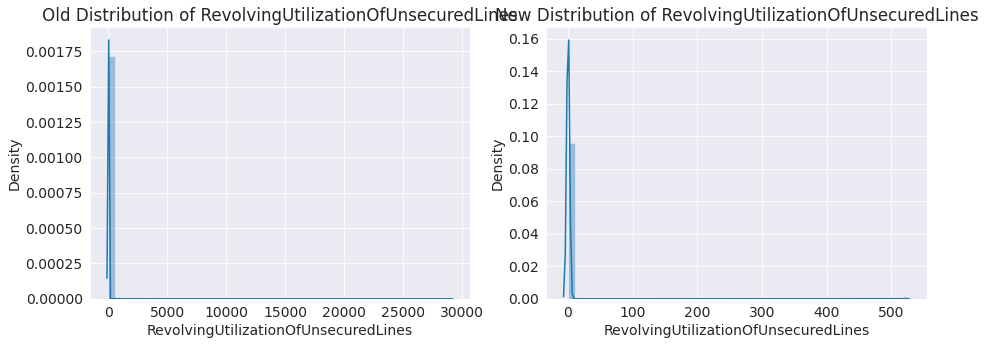

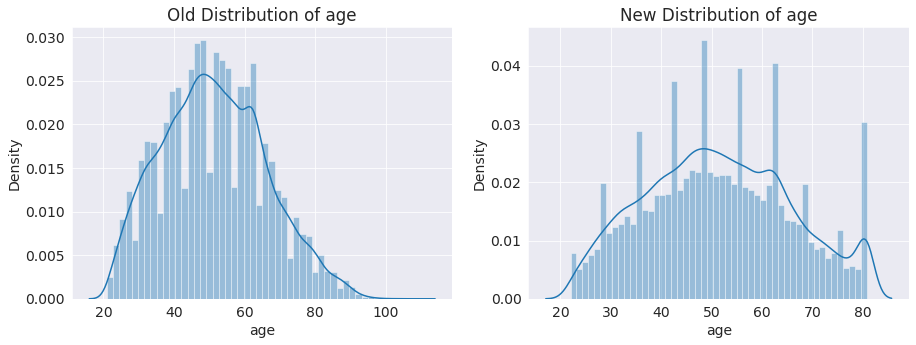

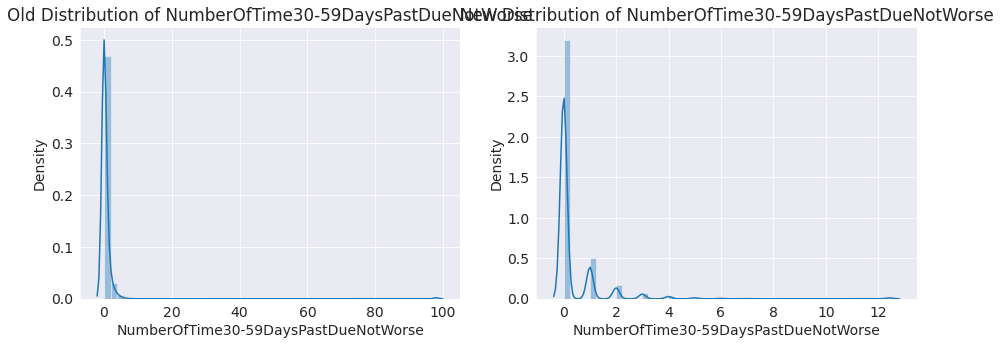

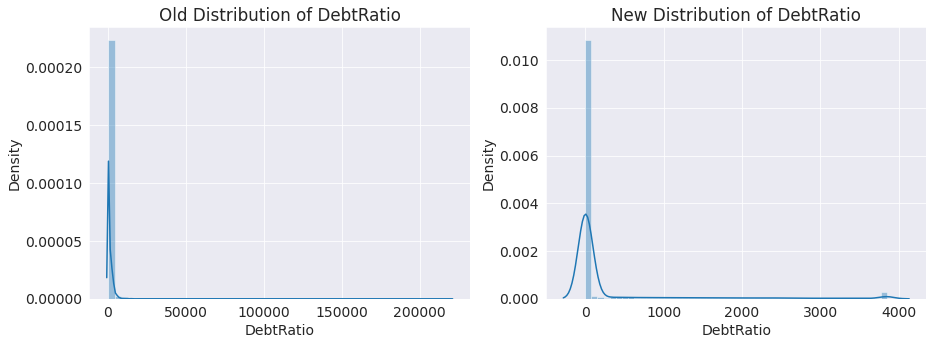

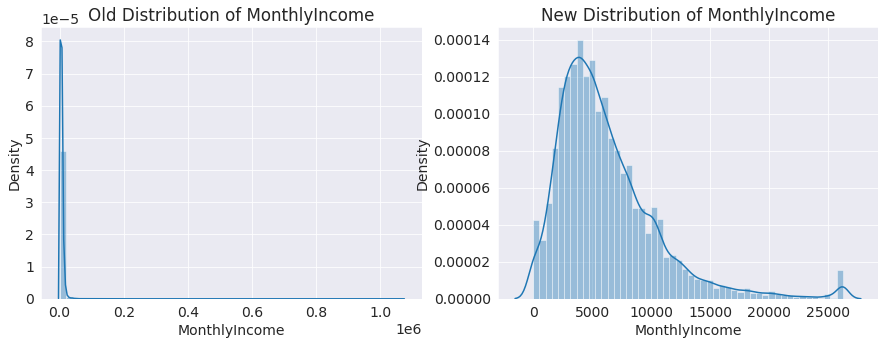

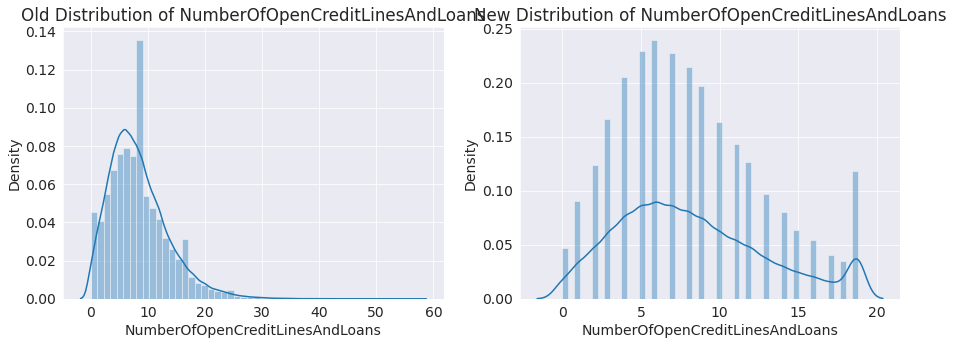

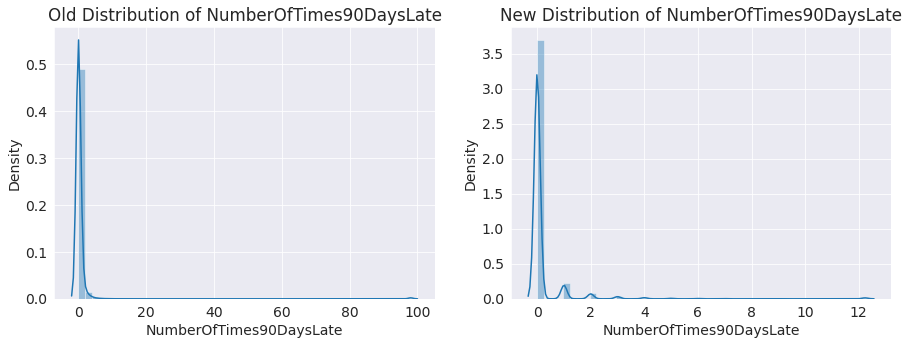

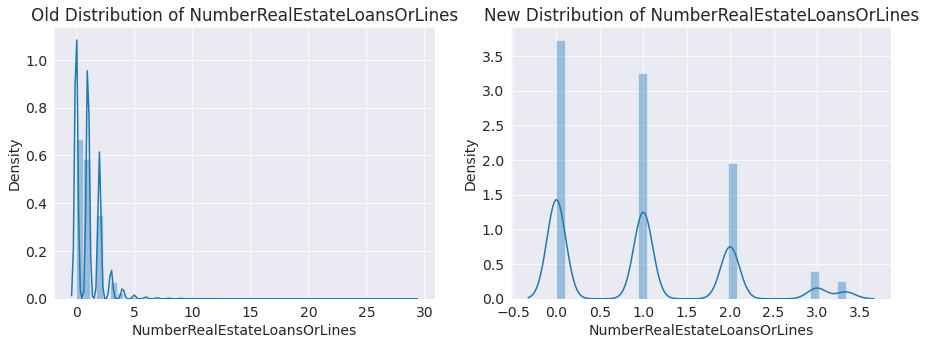

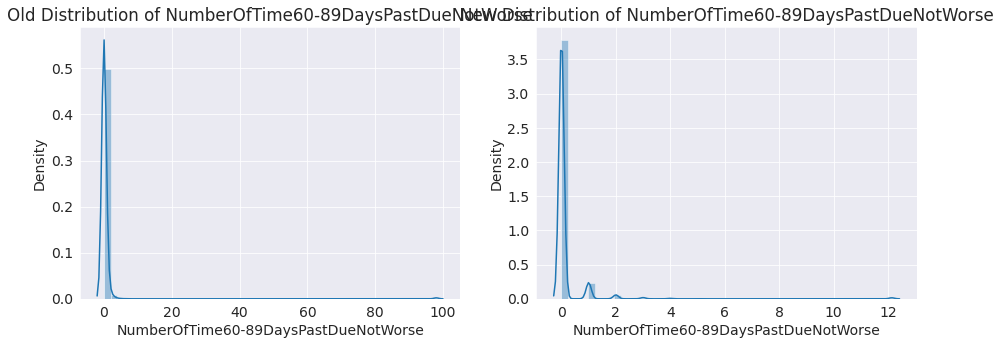

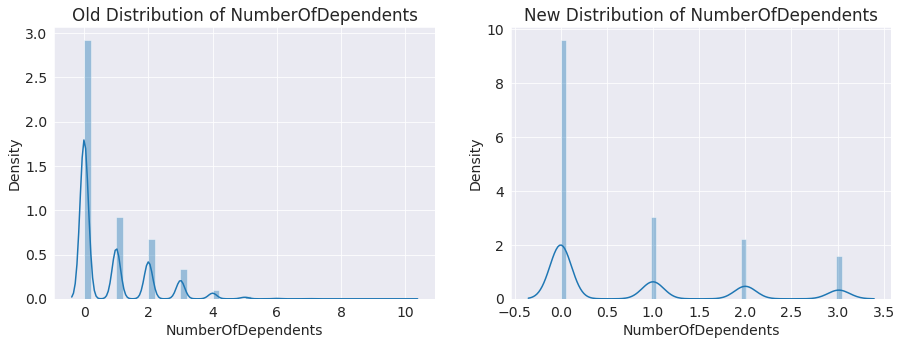

In [26]:
for i in range(0,10):
    NormAtt(i, train_limits, train_df)

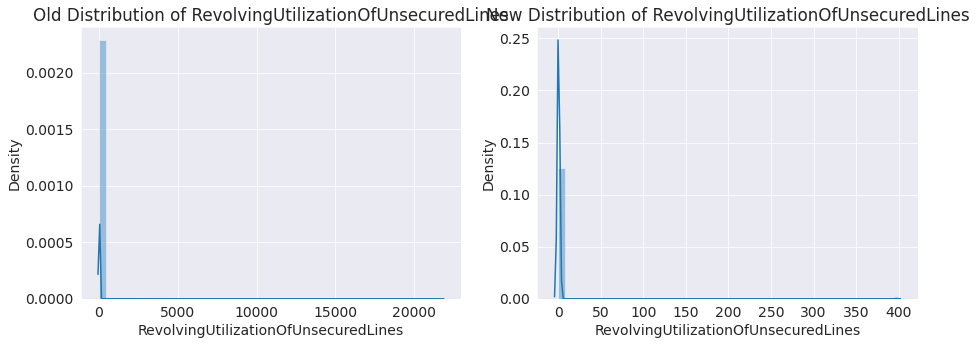

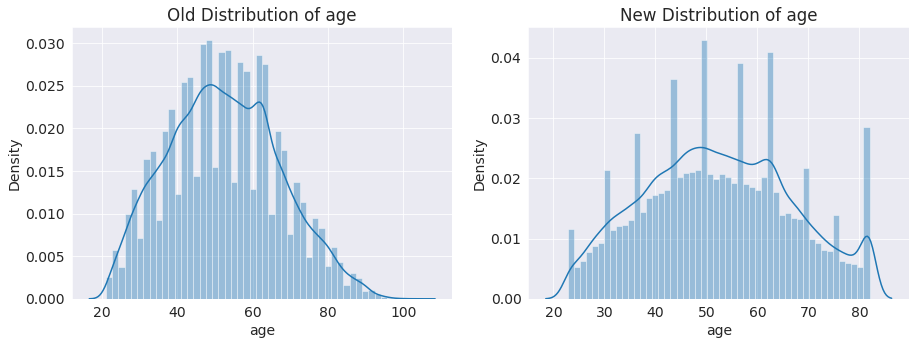

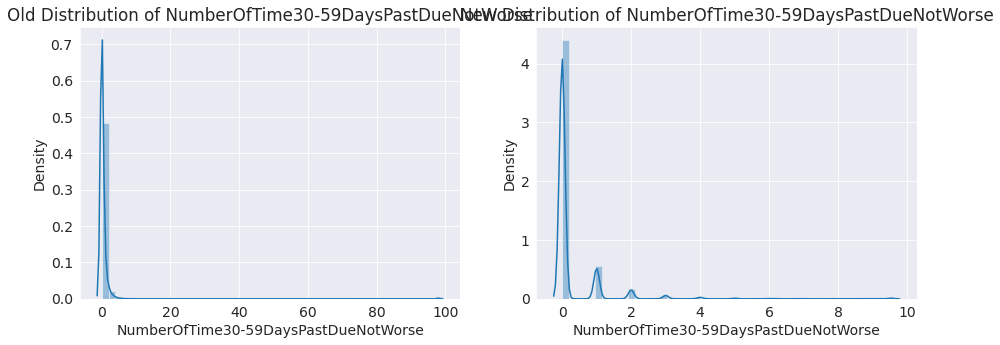

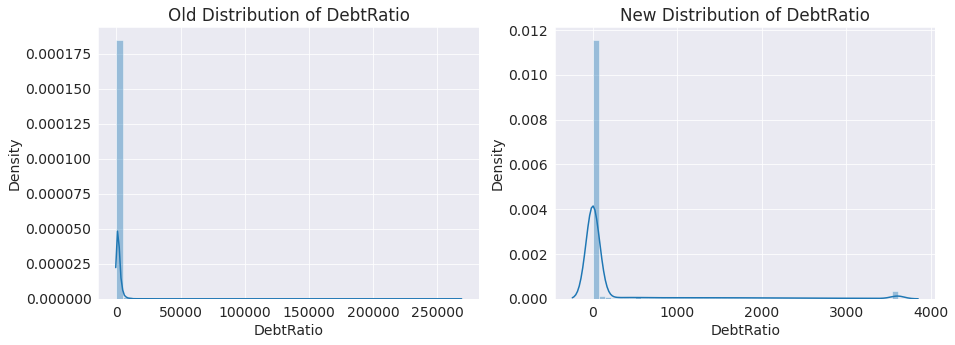

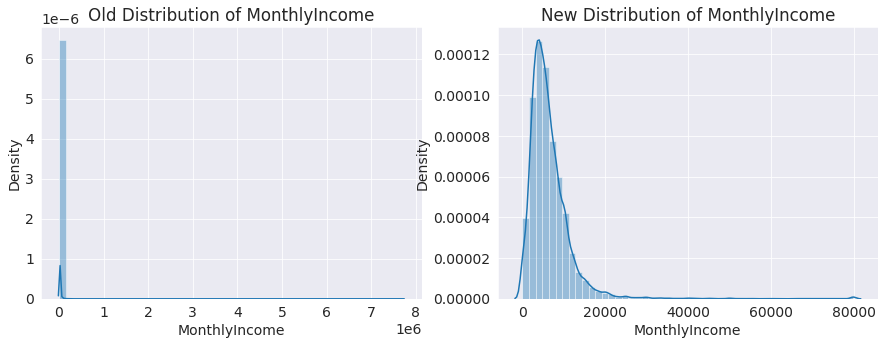

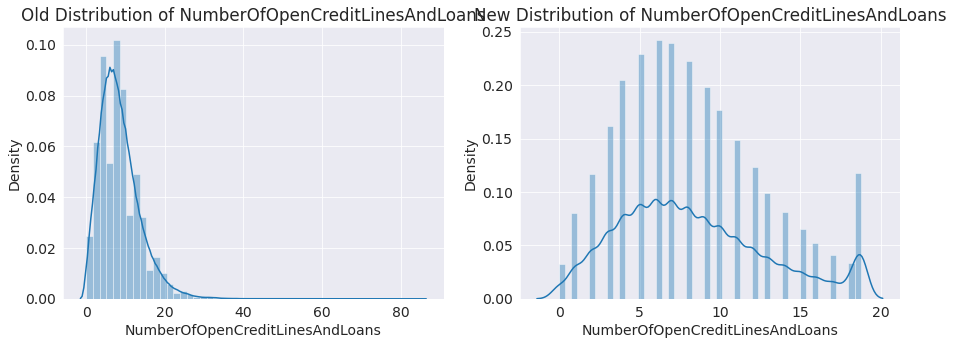

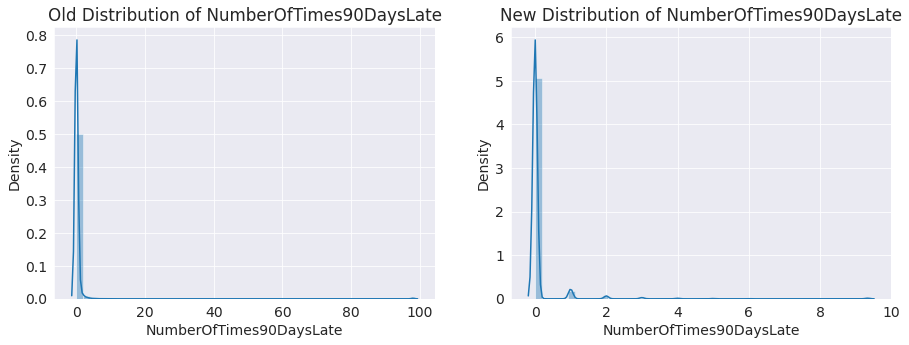

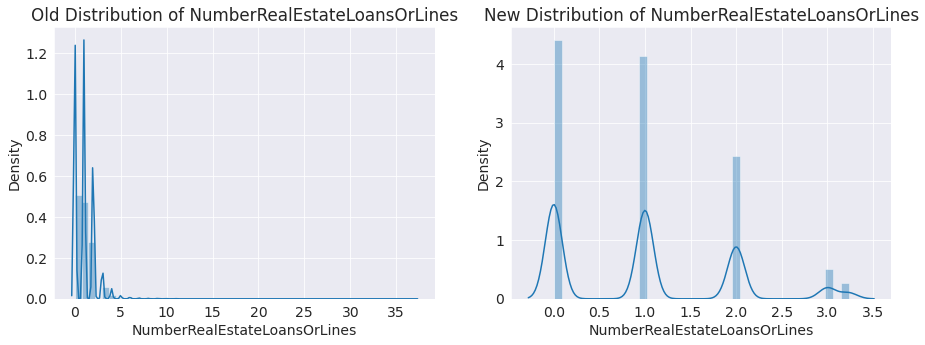

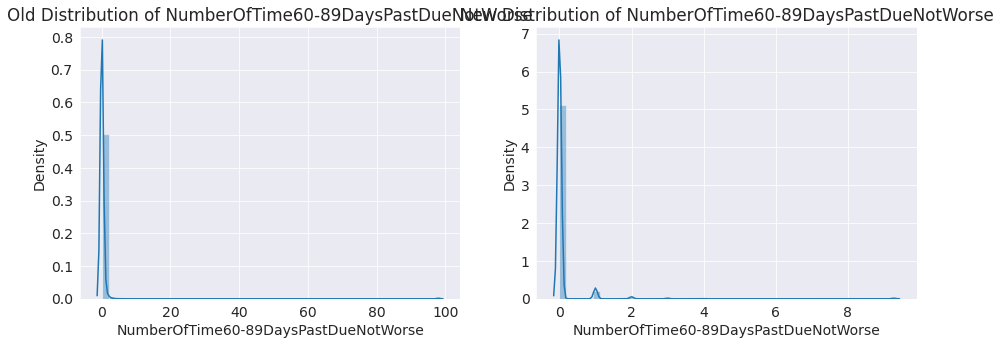

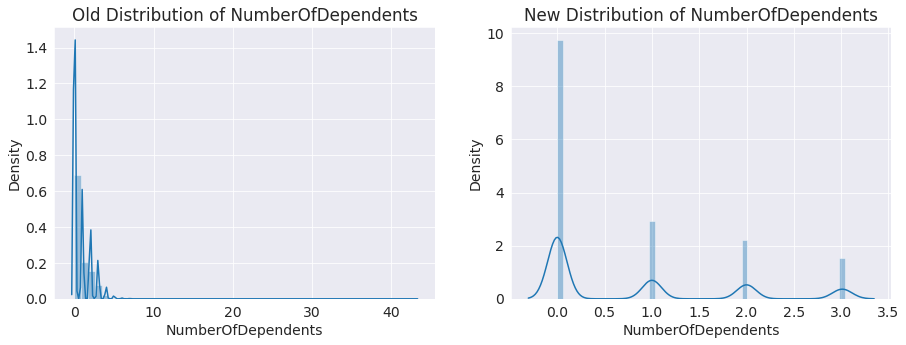

In [27]:
for i in range(0,10):
    NormAtt(i, test_limits, test_df)

### Input and Target Columns

In [28]:
train_df.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [29]:
input_cols = ['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents']
target_col = 'SeriousDlqin2yrs'

In [30]:
inputs = train_df[input_cols].copy()
targets = train_df[target_col].copy()

In [31]:
test_inputs = test_df[input_cols].copy()

### Imputing missing numeric values

In [33]:
from sklearn.impute import SimpleImputer

In [34]:
imputer = SimpleImputer(strategy = 'median').fit(train_df[input_cols])

In [35]:
inputs[input_cols] = imputer.transform(inputs[input_cols])
test_inputs[input_cols] = imputer.transform(test_inputs[input_cols])

In [36]:
inputs[input_cols].isna().sum()

RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [37]:
test_inputs[input_cols].isna().sum()

RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

### Scaling Numeric Features

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler().fit(train_df[input_cols])

In [40]:
inputs[input_cols] = scaler.transform(inputs[input_cols])
test_inputs[input_cols] = scaler.transform(test_inputs[input_cols])

In [41]:
inputs.describe().loc[['min', 'max']]

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [42]:
test_inputs.describe().loc[['min', 'max']]

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
min,0.000000,0.014229,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
max,0.762465,1.019848,0.766495,0.937056,3.04754,0.998604,0.762357,0.970678,0.76425,0.999025


In [43]:
inputs.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
139612,0.000181,0.612203,0.080423,0.355907,0.198407,0.586107,0.0,0.300187,0.0,0.328346
43004,0.000036,0.816323,0.000000,0.000001,0.228931,0.266412,0.0,0.000000,0.0,0.000000
25978,0.000094,0.833334,0.000000,0.000159,0.258921,0.692672,0.0,0.600374,0.0,0.000000
65486,0.001840,0.442102,0.000000,0.064380,0.198407,0.426260,0.0,0.000000,0.0,0.328346
58609,0.000000,0.442102,0.000000,0.000131,0.228931,0.372977,0.0,0.600374,0.0,0.328346


In [44]:
test_inputs.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.001698,0.357051,0.000000,0.000046,0.217485,0.213130,0.0,0.000000,0.0,0.000000
1,0.000888,0.595192,0.000000,0.000137,0.348777,0.799237,0.0,0.970678,0.0,0.656691
2,0.000083,0.629213,0.000000,0.000179,0.193943,0.639389,0.0,0.300187,0.0,0.656691
3,0.000538,0.272001,0.080423,0.000240,0.122097,0.372977,0.0,0.600374,0.0,0.000000
4,0.001918,0.084890,0.000000,0.000005,0.147470,0.213130,0.0,0.000000,0.0,0.328346


### Modeling

#### Splitting

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_val, train_targets, val_targets = train_test_split(inputs, targets, test_size=0.25)

#### Training

We can use `DecisionTreeClassifier` from `sklearn.tree` to train a decision tree.

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
model = DecisionTreeClassifier(random_state=42)

In [80]:
#fitting the model
model.fit(X_train, train_targets)

DecisionTreeClassifier(random_state=42)

#### Evaluation

In [81]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [82]:
train_preds = model.predict(X_train)

In [83]:
train_preds

array([0, 0, 0, ..., 0, 0, 0])

In [84]:
pd.value_counts(train_preds)

0    31465
1     7548
dtype: int64

In [85]:
#Probabilities for each prediction
train_probs = model.predict_proba(X_train)

In [86]:
train_probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [87]:
accuracy_score(train_targets, train_preds)

0.9993335554815062

The training set accuracy is close to 100%! But we can't rely solely on the training set accuracy, we must evaluate the model on the validation set too.We can make predictions and compute accuracy in one step using `model.score`

In [88]:
model.score(X_val, val_targets)

0.7917723952326029

It appears that the model has learned the training examples perfect, and doesn't generalize well to previously unseen examples. This phenomenon is called "overfitting", and reducing overfitting is one of the most important parts of any machine learning project.

In [89]:
val_targets.value_counts() / len(val_targets)

0    0.809919
1    0.190081
Name: SeriousDlqin2yrs, dtype: float64

Although the training accuracy is 100%, the accuracy on the validation set is just about 79%, which is not even better than always predicting `0`. 

In [90]:
base_acc = accuracy_score(train_targets, train_preds), model.score(X_val, val_targets)
base_acc

(0.9993335554815062, 0.7917723952326029)

#### Visualization of Decision Tree

In [58]:
from sklearn.tree import plot_tree, export_text

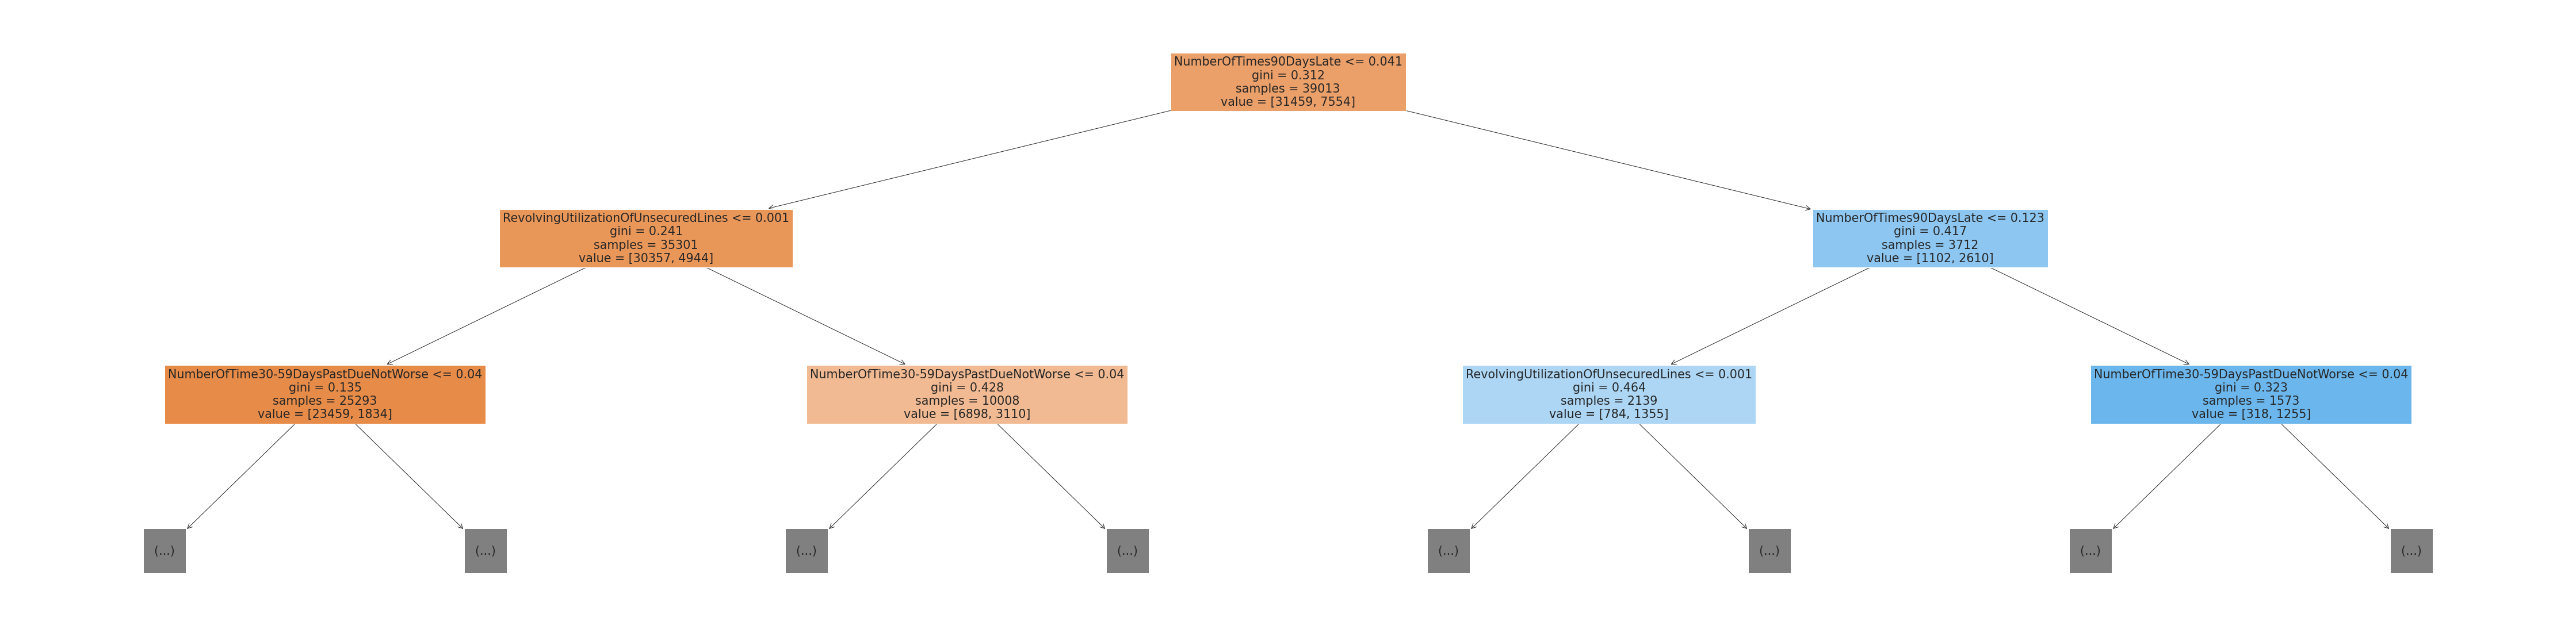

In [59]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True);

In [60]:
model.tree_.max_depth

36

In [61]:
tree_text = export_text(model, max_depth=10, feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- NumberOfTimes90DaysLate <= 0.04
|   |--- RevolvingUtilizationOfUnsecuredLines <= 0.00
|   |   |--- NumberOfTime30-59DaysPastDueNotWorse <= 0.04
|   |   |   |--- NumberOfTime60-89DaysPastDueNotWorse <= 0.04
|   |   |   |   |--- RevolvingUtilizationOfUnsecuredLines <= 0.00
|   |   |   |   |   |--- NumberRealEstateLoansOrLines <= 0.95
|   |   |   |   |   |   |--- age <= 0.42
|   |   |   |   |   |   |   |--- NumberOfOpenCreditLinesAndLoans <= 0.83
|   |   |   |   |   |   |   |   |--- NumberOfOpenCreditLinesAndLoans <= 0.35
|   |   |   |   |   |   |   |   |   |--- MonthlyIncome <= 0.09
|   |   |   |   |   |   |   |   |   |   |--- MonthlyIncome <= 0.09
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 13
|   |   |   |   |   |   |   |   |   |   |--- MonthlyIncome >  0.09
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- MonthlyIncome >  0.09
|   |   |   |   |   |   |   |   |   |   |--- MonthlyIncome <= 0.38
|   |  

#### Feature Importance

In [62]:
model.feature_importances_

array([0.21803888, 0.10733392, 0.04984764, 0.15949507, 0.1291687 ,
       0.06860868, 0.18041464, 0.02803618, 0.02385809, 0.03519819])

In [63]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [64]:
importance_df.head(10)

,feature,importance
0,RevolvingUtilizationOfUnsecuredLines,0.218039
6,NumberOfTimes90DaysLate,0.180415
3,DebtRatio,0.159495
4,MonthlyIncome,0.129169
1,age,0.107334
5,NumberOfOpenCreditLinesAndLoans,0.068609
2,NumberOfTime30-59DaysPastDueNotWorse,0.049848
9,NumberOfDependents,0.035198
7,NumberRealEstateLoansOrLines,0.028036
8,NumberOfTime60-89DaysPastDueNotWorse,0.023858


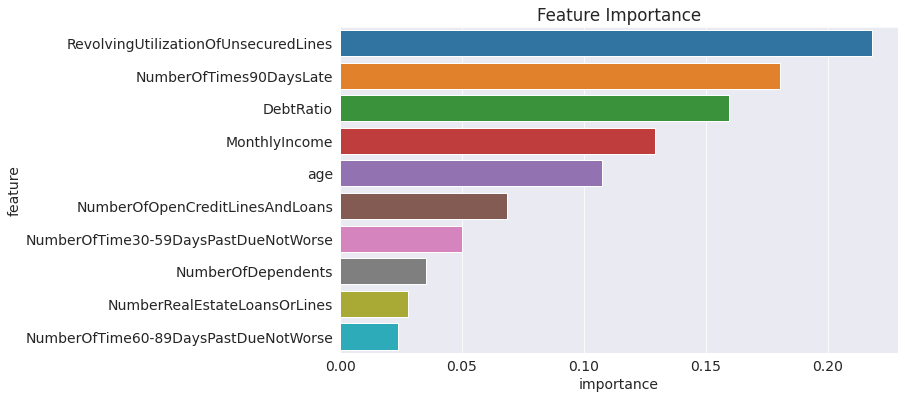

In [65]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

### Hyperparameter Tuning
We will define a function that will check the accuracy with different parameters and their various values over a range. Also plotting the graph of relation between the accuracy and parameter values.

In [71]:
def test_params(**params):
    model = DecisionTreeClassifier(random_state=42, **params)
    model.fit(X_train, train_targets)
    train_score = accuracy_score(model.predict(X_train), train_targets)
    val_score = accuracy_score(model.predict(X_val), val_targets)
    return train_score, val_score
def test_param_and_plot(param_name, param_values):
    train_acc, val_acc = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_score, val_score = test_params(**params)
        train_acc.append(train_score)
        val_acc.append(val_score)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_acc)
    plt.plot(param_values, val_acc)
    plt.xlabel(param_name)
    plt.ylabel('Accuracy')
    plt.legend(['Training', 'Validation'])
    print('Max Acc by:', val_acc.index(max(val_acc))+ int(min(param_values)))

#### `criterion`

In [98]:
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, train_targets)
print(base_acc)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9993335554815062, 0.7917723952326029)


(0.9993335554815062, 0.7925413302575932)

In [103]:
model = DecisionTreeClassifier(criterion='gini', random_state=42)
model.fit(X_train, train_targets)
print(base_acc)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9993335554815062, 0.7917723952326029)


(0.9993335554815062, 0.7917723952326029)

`criterion='entropy'` increases the accuracy

#### `splitter`

In [100]:
model = DecisionTreeClassifier(criterion='entropy', splitter='random', random_state=42)
model.fit(X_train, train_targets)
print(base_acc)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9993335554815062, 0.7917723952326029)


(0.9993335554815062, 0.7912341407151096)

In [101]:
model = DecisionTreeClassifier(criterion='entropy', splitter='best', random_state=42)
model.fit(X_train, train_targets)
print(base_acc)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9993335554815062, 0.7917723952326029)


(0.9993335554815062, 0.7925413302575932)

though `splitter='best'` gives more accuracy than the `splitter='random'` but it is same as before cause it is a default arguement

#### `max_depth`

Max Acc by: 6


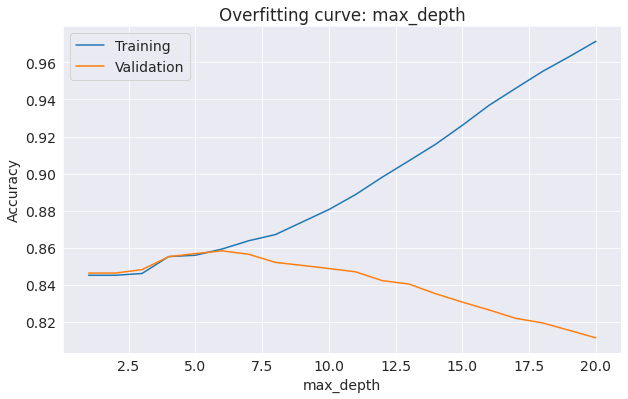

In [104]:
test_params(criterion='entropy')
max_depth=[i for i in range(1,21)]
test_param_and_plot('max_depth',max_depth)

In [105]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=6, random_state=42)
model.fit(X_train, train_targets)
print(base_acc)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9993335554815062, 0.7917723952326029)


(0.8584318047830211, 0.8598231449442522)

#### `max_leaf_nodes`

Max Acc by: 41


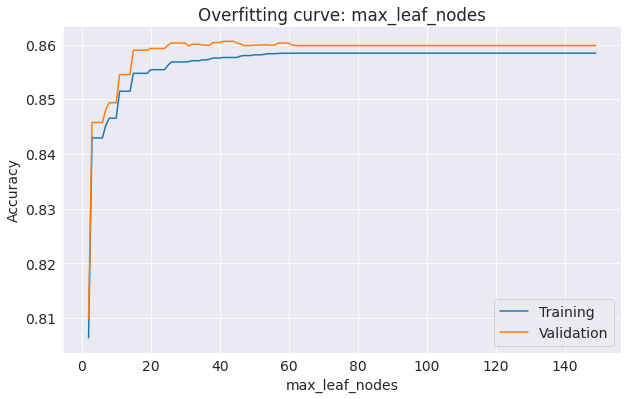

In [117]:
def test_params(**params):
    model = DecisionTreeClassifier(random_state=42,criterion='entropy', max_depth=6, **params)
    model.fit(X_train, train_targets)
    train_score = accuracy_score(model.predict(X_train), train_targets)
    val_score = accuracy_score(model.predict(X_val), val_targets)
    return train_score, val_score
max_leaf_nodes=[i for i in range(2,150)]
test_param_and_plot('max_leaf_nodes',max_leaf_nodes)

In [120]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=6, max_leaf_nodes=41, random_state=42)
model.fit(X_train, train_targets)
print(base_acc)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9993335554815062, 0.7917723952326029)


(0.8576371978571246, 0.8605920799692426)

#### `min_samples_split`

Max Acc by: 242


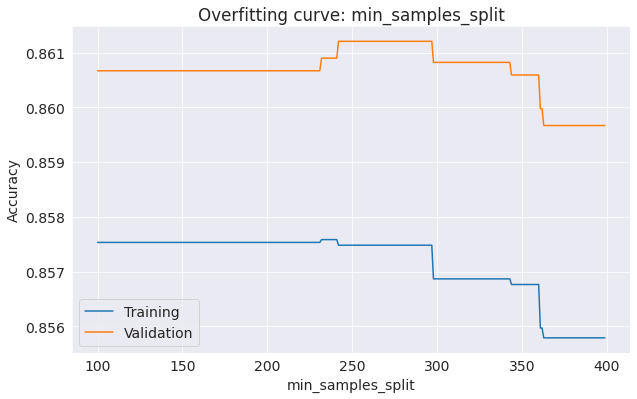

In [123]:
def test_params(**params):
    model = DecisionTreeClassifier(random_state=42,criterion='entropy', max_depth=6,max_leaf_nodes=41, **params)
    model.fit(X_train, train_targets)
    train_score = accuracy_score(model.predict(X_train), train_targets)
    val_score = accuracy_score(model.predict(X_val), val_targets)
    return train_score, val_score
min_samples_split=[i for i in range(100,400)]
test_param_and_plot('min_samples_split',min_samples_split)

In [127]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=6, max_leaf_nodes=32,min_samples_split=242, random_state=42)
model.fit(X_train, train_targets)
print(base_acc)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9993335554815062, 0.7917723952326029)


(0.8569963858201113, 0.8605920799692426)

#### `min_samples_leaf`

Max Acc by: 1


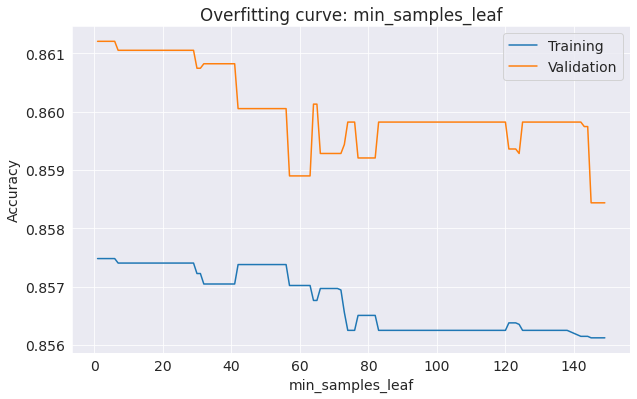

In [128]:
def test_params(**params):
    model = DecisionTreeClassifier(random_state=42,criterion='entropy', max_depth=6,max_leaf_nodes=41,min_samples_split=242, **params)
    model.fit(X_train, train_targets)
    train_score = accuracy_score(model.predict(X_train), train_targets)
    val_score = accuracy_score(model.predict(X_val), val_targets)
    return train_score, val_score
min_samples_leaf=[i for i in range(1,150)]
test_param_and_plot('min_samples_leaf',min_samples_leaf)

In [130]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=6, max_leaf_nodes=32,min_samples_split=242 ,min_samples_leaf=1, random_state=42)
model.fit(X_train, train_targets)
print(base_acc)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9993335554815062, 0.7917723952326029)


(0.8569963858201113, 0.8605920799692426)

#### `max_features`

Max Acc by: 8


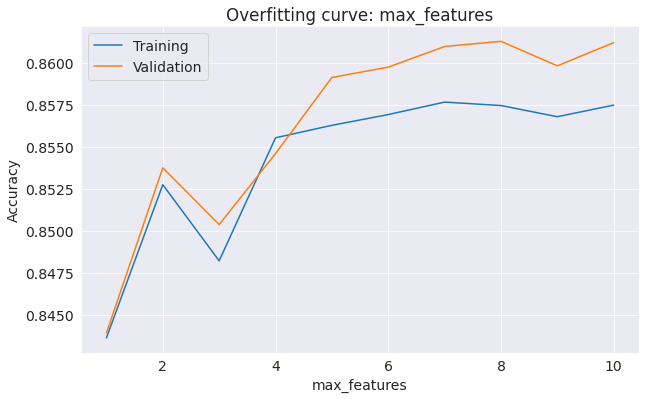

In [131]:
def test_params(**params):
    model = DecisionTreeClassifier(random_state=42,criterion='entropy', max_depth=6,max_leaf_nodes=41,min_samples_split=242,min_samples_leaf=1, **params)
    model.fit(X_train, train_targets)
    train_score = accuracy_score(model.predict(X_train), train_targets)
    val_score = accuracy_score(model.predict(X_val), val_targets)
    return train_score, val_score
min_samples_leaf=[i for i in range(1,150)]
max_features=[i for i in range(1,11)]
test_param_and_plot('max_features',max_features)

In [132]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=6, max_leaf_nodes=32,min_samples_split=242 ,min_samples_leaf=1, max_features=8, random_state=42)
model.fit(X_train, train_targets)
print(base_acc)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9993335554815062, 0.7917723952326029)


(0.8569963858201113, 0.8605920799692426)

#### `min_impurity_decrease`

Max Acc by: 0


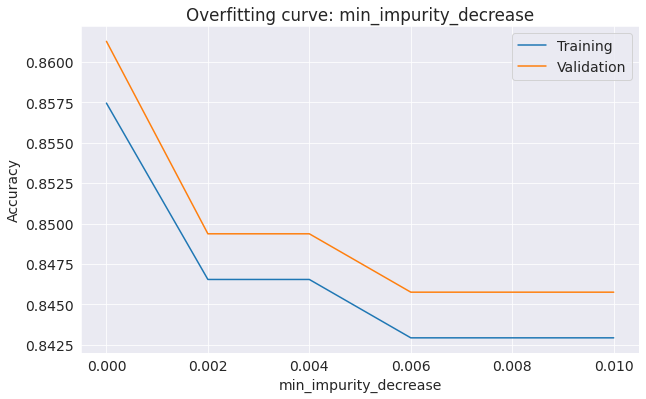

In [136]:
def test_params(**params):
    model = DecisionTreeClassifier(random_state=42,criterion='entropy', max_depth=6,
                                   max_leaf_nodes=41,min_samples_split=242,min_samples_leaf=1,
                                   max_features=8, **params)
    model.fit(X_train, train_targets)
    train_score = accuracy_score(model.predict(X_train), train_targets)
    val_score = accuracy_score(model.predict(X_val), val_targets)
    return train_score, val_score
min_impurity_decrease=[0.0,0.002, 0.004, 0.006, 0.008, 0.01]
test_param_and_plot('min_impurity_decrease',min_impurity_decrease)

In [137]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=6, max_leaf_nodes=32,
                               min_samples_split=242 ,min_samples_leaf=1, max_features=8,
                               min_impurity_decrease=0.0, random_state=42)
model.fit(X_train, train_targets)
print(base_acc)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9993335554815062, 0.7917723952326029)


(0.8569963858201113, 0.8605920799692426)

#### `class_weight`

In [138]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=6, max_leaf_nodes=32,
                               min_samples_split=242 ,min_samples_leaf=1, max_features=8,
                               min_impurity_decrease=0.0,class_weight={0:15.5, 1:1}, random_state=42)
model.fit(X_train, train_targets)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.8117294235254915, 0.8143021914648212)

In [139]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=6, max_leaf_nodes=32,
                               min_samples_split=242 ,min_samples_leaf=1, max_features=8,
                               min_impurity_decrease=0.0,class_weight={0:1.5, 1:1}, random_state=42)
model.fit(X_train, train_targets)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.8528951887832261, 0.8558246828143022)

In [140]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=6, max_leaf_nodes=32,
                               min_samples_split=242 ,min_samples_leaf=1, max_features=8,
                               min_impurity_decrease=0.0,class_weight={0:5, 1:1}, random_state=42)
model.fit(X_train, train_targets)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.8144208340809473, 0.8182237600922722)

In [141]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=6, max_leaf_nodes=32,
                               min_samples_split=242 ,min_samples_leaf=1, max_features=8,
                               min_impurity_decrease=0.0,class_weight={0:1, 1:0}, random_state=42)
model.fit(X_train, train_targets)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.8063722348960602, 0.8099192618223761)

In [142]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=6, max_leaf_nodes=32,
                               min_samples_split=242 ,min_samples_leaf=1, max_features=8,
                               min_impurity_decrease=0.0,class_weight={0:1, 1:0.5}, random_state=42)
model.fit(X_train, train_targets)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.8465127008945736, 0.8504421376393695)

None of the combination of weights are seem to be working here

#### Combining all of the above
Though we tried different combinations of parameters some of them seemed to be continuing the same accuracy i.e. tuning of those parameters isn't increasing the accuracy neither decreasing it so we are still continuing with them.

In [145]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=6, max_leaf_nodes=32,
                               min_samples_split=242 ,min_samples_leaf=1, max_features=8,
                               min_impurity_decrease=0.0,random_state=42)
model.fit(X_train, train_targets)
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.8569963858201113, 0.8605920799692426)

In [146]:
test_preds=model.predict(test_inputs)
test_preds

array([0, 0, 0, ..., 0, 0, 0])

In [147]:
pd.value_counts(test_preds) / len(test_preds)

0    0.912475
1    0.087525
dtype: float64

In [148]:
submission['Probability']=test_preds
submission.head()

,Id,Probability
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [149]:
submission.to_csv('submission.csv', index=None)

It gives the accuracy of 72.20% which is good but we will have to try different algorithm.

To Be Continued...